In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error



In [273]:
baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")
del baseDeDonnees["sunset_hhmm"]
del baseDeDonnees["sunrise_hhmm"]
baseDeDonnees


C:\Users\test8\AppData\Local\Temp\ipykernel_17816\2278083711.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-05-14,27.4,21.08,19.85,12.3,30.0,NaN,81,56.8,60.0,39,...,NaN,NaN,7.0,2.9,3.5,0.0,NaN,NaN,NaN,NaN
2025-05-13,26.8,19.01,18.00,9.2,27.0,NaN,73,45.6,50.5,28,...,NaN,NaN,7.0,4.5,4.0,1.0,NaN,NaN,NaN,NaN
2025-05-12,21.3,15.28,15.60,9.9,NaN,NaN,55,42.0,42.0,29,...,NaN,NaN,8.0,7.1,5.5,3.0,NaN,NaN,NaN,NaN
2025-05-11,17.1,10.47,10.40,3.7,NaN,NaN,65,40.9,42.0,19,...,NaN,NaN,8.0,1.6,4.0,0.0,NaN,NaN,NaN,NaN
2025-05-10,18.9,11.88,13.00,7.1,NaN,NaN,96,77.2,70.0,44,...,NaN,NaN,8.0,7.2,5.5,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-05-18,17.2,12.41,11.95,6.7,NaN,NaN,89,62.5,66.0,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-17,15.0,12.82,11.95,8.9,NaN,NaN,96,81.9,80.5,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-16,18.3,14.22,14.45,10.6,NaN,NaN,80,65.6,68.0,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
#Verifier quel donné sont trop peu.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc


max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.746541
                               ...   
min_cloud_cover_8            0.789149
max_cloud_cover_10           0.994126
avg_hourly_cloud_cover_10    0.994126
avg_cloud_cover_10           0.994126
min_cloud_cover_10           0.994126
Length: 69, dtype: float64

In [275]:
colonne_valide = baseDeDonnees.columns[null_prc < 0.05]
colonne_valide.shape[0]

36

In [276]:
baseDeDonnees = baseDeDonnees[colonne_valide].copy()
baseDeDonnees.dtypes

max_temperature                 float64
avg_hourly_temperature          float64
avg_temperature                 float64
min_temperature                 float64
max_relative_humidity             int64
avg_hourly_relative_humidity    float64
avg_relative_humidity           float64
min_relative_humidity             int64
max_dew_point                   float64
avg_hourly_dew_point            float64
avg_dew_point                   float64
min_dew_point                   float64
max_wind_speed                    int64
avg_hourly_wind_speed           float64
avg_wind_speed                  float64
min_wind_speed                    int64
max_pressure_sea                float64
avg_hourly_pressure_sea         float64
avg_pressure_sea                float64
min_pressure_sea                float64
max_pressure_station            float64
avg_hourly_pressure_station     float64
avg_pressure_station            float64
min_pressure_station            float64
max_visibility                    int64


In [277]:
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()
#Remplir les trous dans la base de donné par avec la valeurs avant.
baseDeDonnees = baseDeDonnees.ffill()
#Verification qu'il ne manque plus de manque de donnés.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc



max_temperature                 0.0
avg_hourly_temperature          0.0
avg_temperature                 0.0
min_temperature                 0.0
max_relative_humidity           0.0
avg_hourly_relative_humidity    0.0
avg_relative_humidity           0.0
min_relative_humidity           0.0
max_dew_point                   0.0
avg_hourly_dew_point            0.0
avg_dew_point                   0.0
min_dew_point                   0.0
max_wind_speed                  0.0
avg_hourly_wind_speed           0.0
avg_wind_speed                  0.0
min_wind_speed                  0.0
max_pressure_sea                0.0
avg_hourly_pressure_sea         0.0
avg_pressure_sea                0.0
min_pressure_sea                0.0
max_pressure_station            0.0
avg_hourly_pressure_station     0.0
avg_pressure_station            0.0
min_pressure_station            0.0
max_visibility                  0.0
avg_hourly_visibility           0.0
avg_visibility                  0.0
min_visibility              

In [278]:
#Rendre en minuscule les titres
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()

<Axes: xlabel='date'>

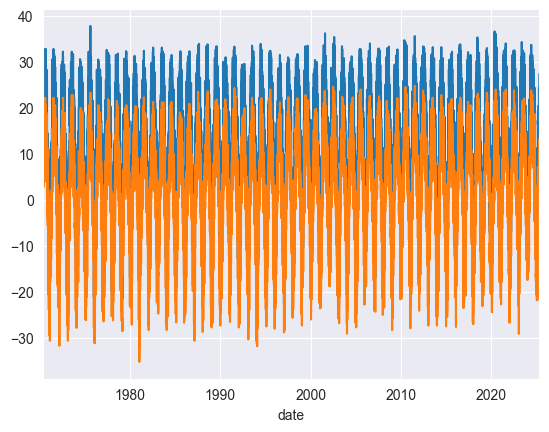

In [279]:
baseDeDonnees.index = pd.to_datetime(baseDeDonnees.index)
baseDeDonnees.index.year.value_counts().sort_index()
baseDeDonnees["max_temperature"].plot()
baseDeDonnees["min_temperature"].plot()


In [280]:
#Inverser les dates.
baseDeDonnees = baseDeDonnees.iloc[::-1]
#Choix de se qu'on veut produire.(Ici temperature maximum)
baseDeDonnees["target"] = baseDeDonnees.shift(-1)["max_temperature"]

baseDeDonnees = baseDeDonnees.ffill()


In [281]:
#Configuration du model
model_rr = Ridge(alpha=0.1)
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
predicteur


Index(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow'],
      dtype='object')

In [282]:
def backtest(baseDeDonnees,model,predicteur,start =3650 ,step=90):
    all_predictions = []
    for i in range(start,baseDeDonnees.shape[0],step):
        train = baseDeDonnees.iloc[:i,:]
        test = baseDeDonnees.iloc[i:i+step,:]

        model.fit(train[predicteur],train["target"])
        preds = model.predict(test[predicteur])
        preds = pd.Series(preds,index =test.index)
        combined = pd.concat([test["target"],preds],axis=1)
        combined.columns = ["Vrais valeur","Valeur predite"]
        combined["difference"] = (combined["Valeur predite"] - combined["Vrais valeur"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [283]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)

In [284]:
#Creer la valeur d'erreur pour la voir diminuer.(En Gros en calcul la moyenne de la difference.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.8698721463545587

In [285]:
def prc_diff(ancienne,nouvelle):
    return (nouvelle - ancienne) /ancienne
def computer_rolling(baseDeDonnees,horizon,col):
    label = f"rolling_{horizon}_{col}"

    baseDeDonnees[label] = baseDeDonnees[col].rolling(horizon).mean()
    baseDeDonnees[f"{label}_pct"] = prc_diff(baseDeDonnees[label],baseDeDonnees[col])
    return baseDeDonnees
rolling_horizon = [3, 14]

for horizon in  rolling_horizon:
    for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
        baseDeDonnees = computer_rolling(baseDeDonnees,horizon,col)

#Enlever les valeurs NaN generer parce que les il n'y as de donnes les 14 derniers jours.
baseDeDonnees = baseDeDonnees.iloc[14:,:]
baseDeDonnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,rolling_14_max_temperature,rolling_14_max_temperature_pct,rolling_14_min_temperature,rolling_14_min_temperature_pct,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snow,rolling_14_snow_pct
date,,,,,,,,,,,,,,,,,,,,,
1970-05-28,16.1,10.76,9.45,2.8,89,56.6,63.5,38,4.4,1.9,...,18.492857,-0.129394,7.907143,-0.645890,2.014286,-1.000000,2.014286,-1.000000,0.0,NaN
1970-05-29,20.6,14.22,12.50,4.4,89,53.2,58.0,27,6.7,3.4,...,18.692857,0.102025,7.821429,-0.437443,2.014286,-1.000000,2.014286,-1.000000,0.0,NaN
1970-05-30,25.0,17.35,16.64,8.3,80,58.6,58.5,37,11.1,8.6,...,19.171429,0.304024,7.657143,0.083955,1.907143,-1.000000,1.907143,-1.000000,0.0,NaN
1970-05-31,26.7,19.68,19.45,12.2,90,68.0,72.5,55,18.3,13.4,...,20.007143,0.334523,7.892857,0.545701,1.364286,-0.047120,1.364286,-0.047120,0.0,NaN
1970-06-01,27.8,22.00,23.05,18.3,97,78.9,78.5,60,19.4,17.9,...,20.764286,0.338837,8.721429,1.098280,1.600000,1.062500,1.600000,1.062500,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-10,18.9,11.88,13.00,7.1,96,77.2,70.0,44,10.9,7.5,...,18.342857,0.030374,7.092857,0.001007,3.785714,2.750943,3.785714,2.750943,0.0,NaN
2025-05-11,17.1,10.47,10.40,3.7,65,40.9,42.0,19,2.0,-3.3,...,18.242857,-0.062647,7.200000,-0.486111,3.114286,-1.000000,3.114286,-1.000000,0.0,NaN
2025-05-12,21.3,15.28,15.60,9.9,55,42.0,42.0,29,4.2,2.2,...,18.278571,0.165299,7.471429,0.325048,3.114286,-1.000000,3.114286,-1.000000,0.0,NaN


In [286]:
def expend_mean(baseDeDonnees):
    return baseDeDonnees.expanding(1).mean()
for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
    baseDeDonnees[f"month_avg_{col}"] = baseDeDonnees[col].groupby(baseDeDonnees.index.month,group_keys = False).apply(expend_mean)
    baseDeDonnees[f"day_year_avg_{col}"] = baseDeDonnees[col].groupby(baseDeDonnees.index.day_of_year,group_keys = False).apply(expend_mean)

In [287]:
#Creation a nouveau de notre predicteur avec les nouvelles colonnes creer au dessus.
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonnees.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonnees = baseDeDonnees.fillna(0)


In [288]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.84845e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.8455e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.84764e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.85053e-35): result may not be accurate.
  return linalg.solve(

In [289]:
#Voir le taux d'erreur pour comparer avec le taux d'erreur d'avant que nous avons calculer au dessus.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.7297036621961843

In [290]:
#Permet de voir les jours qui on une enorme difference dans nos predictions pour savoir futurement pourquoi et essayer de regler cela.
predictions.sort_values("difference", ascending=False)

,Vrais valeur,Valeur predite,difference
date,,,
1990-11-27,19.2,1.496583,17.703417
1994-01-27,8.1,-7.685355,15.785355
1998-01-01,5.3,-9.872738,15.172738
1997-02-17,8.2,-6.964478,15.164478
2014-04-13,24.5,9.903082,14.596918
...,...,...,...
2014-05-06,15.8,15.799332,0.000668
1993-01-21,3.4,3.400593,0.000593
2009-11-18,8.6,8.600518,0.000518


In [291]:
valeurs_dernier_jour = baseDeDonnees.iloc[-1][predicteur].values.reshape(1, -1)
prediction_target = model_rr.predict(valeurs_dernier_jour)[0]

nouvelles_valeurs = {"target": prediction_target}

# Pour les autres colonnes, mettre NaN
for var in baseDeDonnees.columns:
    if var != "target":
        nouvelles_valeurs[var] = np.nan
nouvelles_valeurs["max_temperature"] = prediction_target

date_suivante = baseDeDonnees.index[-1] + pd.Timedelta(days=1)
nouvelle_ligne = pd.DataFrame([nouvelles_valeurs], index=[date_suivante])

baseDeDonnees = pd.concat([baseDeDonnees, nouvelle_ligne])

baseDeDonnees.tail(10)


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,month_avg_max_temperature,day_year_avg_max_temperature,month_avg_min_temperature,day_year_avg_min_temperature,month_avg_precipitation,day_year_avg_precipitation,month_avg_rain,day_year_avg_rain,month_avg_snow,day_year_avg_snow
2025-05-06,23.700000,17.46,18.45,13.2,97.0,79.2,76.0,55.0,15.9,13.6,...,19.270665,17.107273,8.150119,5.938182,2.510095,2.994545,2.499050,2.994545,0.003919,0.000000
2025-05-07,20.400000,16.23,15.14,9.9,82.0,70.5,68.5,55.0,12.7,10.8,...,19.271335,17.534545,8.151157,6.034545,2.508724,1.072727,2.497685,1.072727,0.003917,0.000000
2025-05-08,10.600000,8.82,8.35,6.1,93.0,73.4,76.5,60.0,6.6,4.2,...,19.266192,17.898182,8.149941,5.590909,2.507473,2.136364,2.496441,2.049091,0.003915,0.087273
2025-05-09,8.400000,6.86,6.95,5.5,95.0,91.1,88.0,81.0,7.4,5.5,...,19.259751,17.523636,8.148370,6.869091,2.511796,3.574545,2.500771,3.552727,0.003912,0.010909
2025-05-10,18.900000,11.88,13.00,7.1,96.0,77.2,70.0,44.0,10.9,7.5,...,19.259538,18.063636,8.147749,7.581818,2.518720,1.967273,2.507701,1.967273,0.003910,0.000000
2025-05-11,17.100000,10.47,10.40,3.7,65.0,40.9,42.0,19.0,2.0,-3.3,...,19.258259,18.294545,8.145115,6.983636,2.517229,3.085455,2.506217,2.840000,0.003908,0.000000
2025-05-12,21.300000,15.28,15.60,9.9,55.0,42.0,42.0,29.0,4.2,2.2,...,19.259467,18.369091,8.146154,7.081818,2.515740,2.540000,2.504734,2.374545,0.003905,0.000000
2025-05-13,26.800000,19.01,18.00,9.2,73.0,45.6,50.5,28.0,9.6,6.3,...,19.263927,18.334545,8.146777,6.641818,2.514252,1.589091,2.503253,1.618182,0.003903,0.000000
2025-05-14,27.400000,21.08,19.85,12.3,81.0,56.8,60.0,39.0,13.5,11.9,...,19.268735,18.969091,8.149232,7.441818,2.512766,1.925455,2.501773,1.954545,0.003901,0.000000
2025-05-15,25.327165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
